# MHD Wave Dispersion Relations

This notebook introduces linear ideal magnetohydrodynamic (MHD) waves and their properties using PlasmaPy's `mhd_waves_` module.

In [1]:
from plasmapy.dispersion.analytical.mhd_waves_ import *

In [2]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

## Introduction

### Dispersion Relation

The linear, ideal MHD dispersion relation (hereafter we will simply refer to it as the MHD dispersion relation) relates the angular frequency $\omega$ of an MHD wave with its wavenumber $k$. It has three independent roots that correspond to three different modes of propagation, namely the Alfvén, fast magnetosonic, and slow magnetosonic modes. The roots of this dispersion relation can be used to derive expressions for each mode's phase and group velocities.

The MHD dispersion relation can be derived from the system of ideal MHD equations composed of the momentum equation, continuity equation, adiabatic energy equation, and ideal induction equation:
$$
    \rho \frac{D\mathbf{u}}{Dt} = \frac{1}{\mu_0} (\nabla \times \mathbf{B}) \times \mathbf{B} - \nabla p,
$$
$$
    \frac{D\rho}{Dt} = -\rho \nabla \cdot \mathbf{u},
$$
$$
    \frac{D}{Dt} \left(\frac{p}{\rho^\gamma}\right) = 0,
$$
$$
    \frac{\partial\mathbf{B}}{\partial t} = \nabla \times (\mathbf{u} \times \mathbf{B}),
$$
respectively, where the flow velocity $\mathbf{u}$, density $\rho$, plasma pressure $p$, and magnetic field $\mathbf{B}$ are unknown. We assume that the equilibrium is stationary, with a uniform and constant magnetic field, density, and plasma pressure. We can apply perturbation theory to these equations and ignore higher-order terms letting
$$
    \mathbf{u}(\mathbf{r}, t) = \mathbf{u}_1(\mathbf{r}, t),\quad \rho(\mathbf{r}, t) = \rho_0 + \rho_1(\mathbf{r}, t),\\
    p(\mathbf{r}, t) = p_0 + p_1(\mathbf{r}, t),\quad \mathbf{B}(\mathbf{r}, t) = \mathbf{B}_0 + \mathbf{B}_1(\mathbf{r}, t)
$$
where subscripts of 0 indicate equilibrium quantities and subscripts of 1 indicate small-amplitude, first-order corrections to these equilibrium quantities. With these assumptions the system of ideal MHD equations reduces to a system of linear equations.

We can obtain a system of equations in terms of the displacement of the plasma $\int_0^t \mathbf{u}_1(\mathbf{r}, t') dt' = \boldsymbol{\xi}_1(\mathbf{r}, t)$ by first integrating the linearized continuity equation, adiabatic energy equation, and ideal induction equation with respect to time. Solving for their respective perturbed quantities results in
$$
\begin{align*}
    \mathbf{B}_1 &= \nabla \times (\boldsymbol{\xi}_1 \times \mathbf{B}_0), \\
    \rho_1 &= - \rho_0 \nabla \cdot \boldsymbol{\xi}_1, \\
    p_1 &= - \gamma p_0 \nabla \cdot \boldsymbol{\xi}_1.
\end{align*}
$$
Substituting these into the linearized momentum equation gives an expression in terms of the displacement that can then be reduced to a system of linear algebraic equations by first performing Fourier analysis in both space and time. We assume that solutions are of the form of a superposition of plane waves, $\boldsymbol{\xi}_1 = \sum_{\mathbf{k},\omega} \boldsymbol{\xi}_1(\mathbf{k}, \omega) \exp [i(\mathbf{k} \cdot \mathbf{r} - \omega t)]$. Next, without loss of generality, we use a Cartesian coordinate system with the equilibrium magnetic field $\mathbf{B}_0 = B_0 \hat{\mathbf{z}}$ along the $z$-axis and the wavevector $\mathbf{k} = k_\perp \hat{\mathbf{x}} + k_\parallel \hat{\mathbf{z}}$ lying in the $xz$-plane where $\hat{\mathbf{x}}$ and $\hat{\mathbf{z}}$ are the unit vectors along the $x$- and $z$-axis, respectively. The resultant system of algebraic equations can be expressed as
$$
    \begin{bmatrix}
        \omega^2 - v_A^2 k^2 - c_s^2 k_\perp^2 & 0 & -c_s^2 k_\parallel k_\perp \\
        0 & \omega^2 - v_A^2 k_\parallel^2 & 0 \\
        -c_s^2 k_\parallel k_\perp & 0 & \omega^2 - c_s^2 k_\parallel^2
    \end{bmatrix}
    \begin{bmatrix}
        \xi_{x1} \\ \xi_{y1} \\ \xi_{z1}
    \end{bmatrix}
    =
    \begin{bmatrix}
        0 \\ 0 \\ 0
    \end{bmatrix}.
$$
In order for there to be a non-trivial solution, the determinant of the coefficient matrix must be equal to zero. This gives the dispersion relation
$$
    \left(\omega^2 - v_A^2 k _\parallel^2\right) \left(\omega^4 - \omega^2 k^2 c_{ms}^2 + k^2 k_\parallel^2 v_A^2 c_s^2\right) = 0
$$
where $c_{ms} = \sqrt{v_A^2 + c_s^2}$ is the magnetosonic speed (the significance of which will be discussed later).

## Alfvén Wave
The Alfvén wave is defined by the dispersion relation
$$
    \omega^2 - v_A^2 k _\parallel^2 = 0
$$
and is represented in PlasmaPy by the `AlfvenWave` class, which can be instantiated by providing fundamental plasma parameters as arguments.

In [3]:
plasma = {
    'B': 1e-3 * u.T,
    'density': 1e16 * u.m ** -3,
    'ion': 'p+',
    'T': 1.45e6 * u.K,
}
alfven = AlfvenWave(**plasma)

This class (along with the `FastMagnetosonicWave` and `SlowMagnetosonicWave` classes introduced later) have attributes for the plasma beta, Alfvén speed, sound speed, and magnetosonic speed derived from the plasma parameters used to instantiate the class. These values are useful for normalization, as will be seen later.

In [4]:
{
    "Plasma beta": alfven.beta,
    "Alfvén speed": alfven.alfven_speed,
    "Sound speed": alfven.sound_speed,
    "Magnetosonic speed": alfven.magnetosonic_speed
}

{'Plasma beta': <Quantity 0.50314266>,
 'Alfvén speed': <Quantity 218060.97295233 m / s>,
 'Sound speed': <Quantity 141237.85875402 m / s>,
 'Magnetosonic speed': <Quantity 259805.15905258 m / s>}

We can also calculate the angular frequency for a given wavenumber $k$ and angle $\theta$ using the `angular_frequency` method. The arguments for both $k$ and $\theta$ accept single values and arrays of values.

In [5]:
k = 1e-5 * u.rad/u.m
theta = 0 * u.rad

alfven.angular_frequency(k, theta)

<Quantity 2.18060973 rad / s>

In [6]:
k = [1e-5, 1e-6] * u.rad/u.m
theta = [0, np.pi/4, np.pi/2] * u.rad

alfven.angular_frequency(k, theta)

<Quantity [[2.18060973e+00, 1.54192393e+00, 1.33523836e-16],
           [2.18060973e-01, 1.54192393e-01, 1.33523836e-17]] rad / s>

where the $n\text{th}$ row (column) holds values for the $n\text{th}$ wavenumber (angle).

### Characteristics
From the eigenvalue equation used to derive the dispersion relation, the Alfvén wave has the associated (displacement) eigenevector $\boldsymbol{\xi}_1 = \xi_{y1} \hat{\mathbf{y}}$, indicating that plasma is displaced perpendicular to both the direction of propagation and the equilibrium magnetic field; that is, $\mathbf{k} \cdot \boldsymbol{\xi}_1 = \mathbf{B}_0 \cdot \boldsymbol{\xi}_1 = 0$. Thus, the Alfvén wave is transverse and incompressive with both the density and pressure perturbations equal to zero. As a result of the latter, the angular frequency of the linear MHD Alfvén mode is independent of the plasma temperature. For example, comparing the angular frequencies calculated using the previously defined `plasma` parameters with those calculated using the the cold-plasma limit:

In [7]:
cold_plasma = {
    'B': 1e-3 * u.T,
    'density': 1e16 * u.m ** -3,
    'ion': 'p+',
    'T': 0 * u.K,  # cold-plasma limit
}
cold_alfven = AlfvenWave(**cold_plasma)
cold_alfven.beta

<Quantity 0.>

In [8]:
k = np.linspace(1e-6, 1e-5, num=50) * u.rad/u.m
theta = np.linspace(0, 2 * np.pi, num=50) * u.rad

np.array_equal(
    alfven.angular_frequency(k, theta),
    cold_alfven.angular_frequency(k, theta)
)

True


The propagation of an Alfvén wave resembles the propagation of transverse waves along strings under tension. For example, following a transverse deformation of a magnetic field line, a tension force along the magnetic field—referred to as magnetic tension—will act as a restoring force to straighten the field. And since the plasma is ideally conducting, the frozen-in condition applies, and displacement of the magnetic field is accompanied by displacement of the plasma (and vice versa). Therefore, as the bent magnetic field returns to its straight, equilibrium position, plasma is dragged along with the field and gains kinetic energy. When the field reaches its equilibrium position, the inertia of the plasma causes it to continue moving, dragging the magnetic field. The plasma and magnetic field eventually come to a stop with a transverse deformation in the latter.

#### Group Velocity

Like how transverse waves propagating along a string under tension only transfer energy in directions parallel to the string, Alfvén waves only transfer energy in directions parallel with the magnetic field. The group velocity $\mathbf{v}_g = d\omega/d\mathbf{k}$—the direction energy is transferred—is given by the expression
$$
\begin{align*}
    \mathbf{v}_g &= \pm\, \frac{\mathbf{B_0}}{\sqrt{\mu_0 \rho}} \\
    &= \pm\, v_A\, \hat{\mathbf{z}}.
\end{align*}
$$
Energy travels along the magnetic field at this velocity, which has a magnitude equal to the Alfvén speed.

For a given $k$ and $\theta$, the group velocity can be calculated using the `group_velocity` method:

In [9]:
alfven.group_velocity(1e-5 * u.rad/u.m, np.pi/4 * u.rad)

[<Quantity 154192.39268673 m / s>, <Quantity [[-154192.39268673]] m / s>]

where the first (second) element gives the component of the group velocity in the direction of $\mathbf{k}$ (increasing $\theta$).

#### Phase Velocity

While energy and wave packets can only propagate along the magnetic field, the wavefront itself may propagate in a direction oblique to the magnetic field. The wavefront propagates in the direction of a wavevector $\mathbf{k}$ with phase velocity $v_{ph} = \omega/k$ given by the expression
$$
    v_{ph}^2 = v_A^2 \cos^2 \theta.
$$
The dependence on $\cos\theta$ indicates that the wave cannot propagate perpendicular to the magnetic field.

For a given $k$ and $\theta$, the phase velocity can be calculated using the `phase_velocity` method:

In [10]:
alfven.phase_velocity(1e-5 * u.rad/u.m, 0 * u.rad)

<Quantity 218060.97295233 m / s>

### Plotting Phase and Group Velocities

In [11]:
k0 = 1e-5 * u.rad / u.m
theta0 = np.linspace(0, 2 * np.pi, 1000) * u.rad

In [12]:
# Plot formatting

color = ['g', 'r', 'b']
plt.rc('lines', linestyle='None', marker='.', markersize=1)

def ax_format(ax):
    ax.set(
        xlim=(-2, 2),
        ylim=(-2, 2),
        xticks=range(-2,3),
        yticks=range(-2,3),
        aspect=1,
    )
    ax.grid()

    # Plot arrow in direction of B
    ax.text(0.85, 0.9, 'B', transform=ax.transAxes)
    ax.arrow(0.8, 0.88, 0.1, 0, width=0.005, color='black', transform=ax.transAxes)

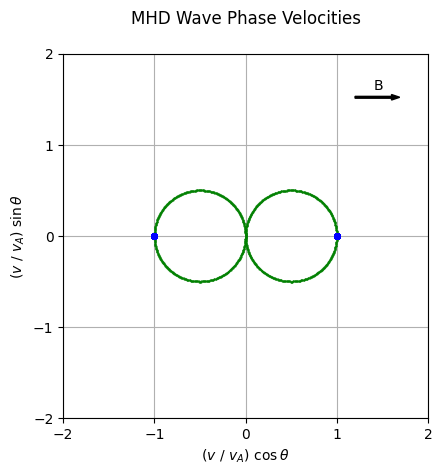

In [13]:
fig, ax = plt.subplots()

alfven = AlfvenWave(**plasma)

# Plot phase velocity
r = alfven.phase_velocity(k0, theta0) / alfven.alfven_speed
ax.plot(
    (r * np.cos(theta0)).value,
    (r * np.sin(theta0)).value,
    color[0]
)

ax.set_xlabel(r'$(v\ /\ v_A) \ \cos \theta$')
ax.set_ylabel(r'$(v\ /\ v_A) \ \sin \theta$')

# Plot group velocity

r, theta = alfven.group_velocity(k0, theta0)
r = r / alfven.alfven_speed
theta = theta / alfven.alfven_speed

ax.plot(
    (r * np.cos(theta0) + theta * np.cos(theta0 + np.pi / 2 * u.rad)).value,
    (r * np.sin(theta0) + theta * np.sin(theta0 + np.pi / 2 * u.rad)).value,
    color[2],
    markersize=8
)
ax_format(ax)


fig.suptitle('MHD Wave Phase Velocities')
fig.tight_layout()
plt.show()

## Magnetosonic Waves
The magnetosonic waves are defined by the dispersion relation
$$
    \omega^4 - \omega^2 k^2(v_A^2 + c_s^2) + k^2 k_\parallel^2 v_A^2 c_s^2 = 0.
$$

### Phase velocity
The magnetosonic waves have phase velocity $v_\pm$ given by the expression
$$
    v_\pm^2 = \frac{1}{2} \left(c_{ms}^2 \pm \sqrt{c_{ms}^4 - 4 v_A^2 c_s^2 \cos^2 \theta}\right)
$$
where the upper sign gives the phase velocity for the fast wave and the lower sign gives the phase velocity for the slow wave.

### Group velocity

The magnetosonic waves have group velocity $\mathbf{v}_g$ given by the expression
$$
    \mathbf{v}_g = \hat{\mathbf{k}} v_{ph} + \hat{\mathbf{\theta}} \frac{d v_{ph}}{d\theta}
$$

## Plotting Everything Together


We will plot the phase and group velocities of the MHD waves using four plasmas with different ratios $\beta$ between the thermal pressure $p = nk_B T$ and the magnetic pressure $p_B = B^2 / (2 \mu_0)$.

In [14]:
inputs = [
    {  # beta = 0.00
        'B': 1e-3 * u.T,
        'density': 1e16 * u.m ** -3,
        'ion': 'p+',
        'T': 0.0 * u.K,
    },
    {  # beta = 0.50
        'B': 1e-3 * u.T,
        'density': 1e16 * u.m ** -3,
        'ion': 'p+',
        'T': 1.45e6 * u.K,
    },
    {  # beta = 1.20
        'B': 1e-3 * u.T,
        'density': 1e16 * u.m ** -3,
        'ion': 'p+',
        'T': 3.45e6 * u.K,
    },
    {  # beta = 2.50
        'B': 1e-3 * u.T,
        'density': 1e16 * u.m ** -3,
        'ion': 'p+',
        'T': 7.2e6 * u.K,
    },
]

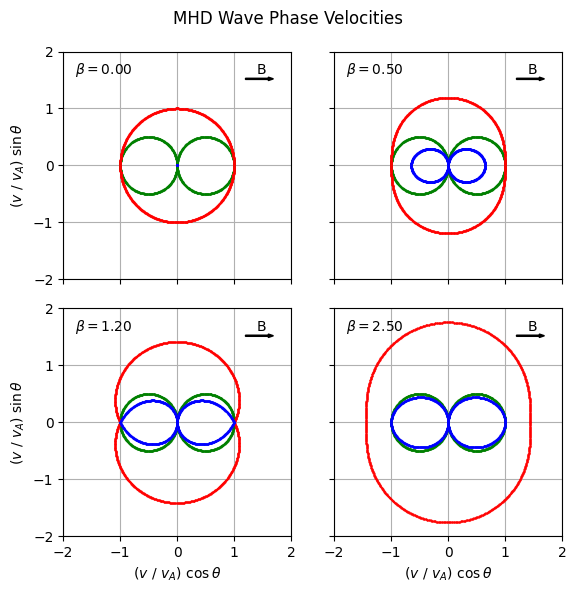

In [15]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(6, 6),
    sharex='col',
    sharey='row',
)

k = 0
for i in range(2):
    for j in range(2):
        waves = mhd_waves(**inputs[k])
        k += 1
        
        for mode in range(3):
            r = waves[mode].phase_velocity(k0, theta0) / waves[mode].alfven_speed
            ax[i][j].plot(
                (r * np.cos(theta0)).value,
                (r * np.sin(theta0)).value,
                color[mode]
            )

        ax_format(ax[i][j])
        text = rf'$\beta = {waves[0].beta:.2f}$'
        ax[i][j].text(0.05, 0.9, text, transform=ax[i][j].transAxes)

    ax[1][i].set_xlabel(r'$(v\ /\ v_A) \ \cos \theta$')
    ax[i][0].set_ylabel(r'$(v\ /\ v_A) \ \sin \theta$')


fig.suptitle('MHD Wave Phase Velocities')
fig.tight_layout()
plt.show()

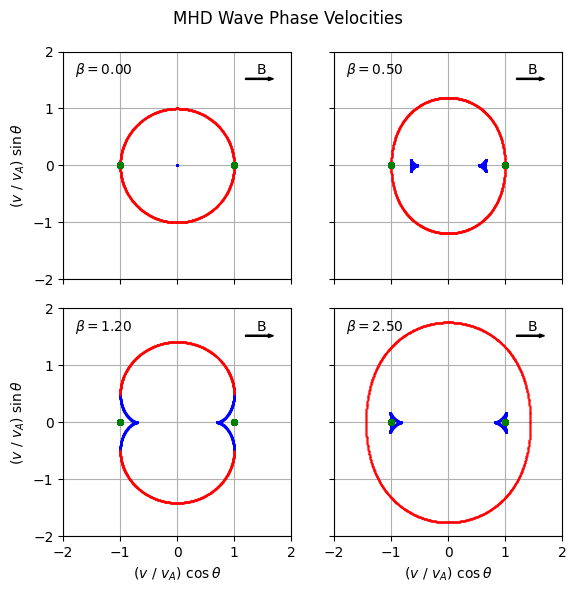

In [16]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(6, 6),
    sharex='col',
    sharey='row',
)

k = 0
for i in range(2):
    for j in range(2):
        waves = mhd_waves(**inputs[k])
        k += 1
        
        for mode in reversed(range(3)):
            r, theta = waves[mode].group_velocity(k0, theta0)
            r = r / waves[mode].alfven_speed
            theta = theta / waves[mode].alfven_speed

            ax[i][j].plot(
                (r * np.cos(theta0) + theta * np.cos(theta0 + np.pi / 2 * u.rad)).value,
                (r * np.sin(theta0) + theta * np.sin(theta0 + np.pi / 2 * u.rad)).value,
                color[mode],
                markersize=8 if mode == 0 else 1
            )

        ax_format(ax[i][j])
        text = rf'$\beta = {waves[0].beta:.2f}$'
        ax[i][j].text(0.05, 0.9, text, transform=ax[i][j].transAxes)

    ax[1][i].set_xlabel(r'$(v\ /\ v_A) \ \cos \theta$')
    ax[i][0].set_ylabel(r'$(v\ /\ v_A) \ \sin \theta$')


fig.suptitle('MHD Wave Phase Velocities')
fig.tight_layout()
plt.show()

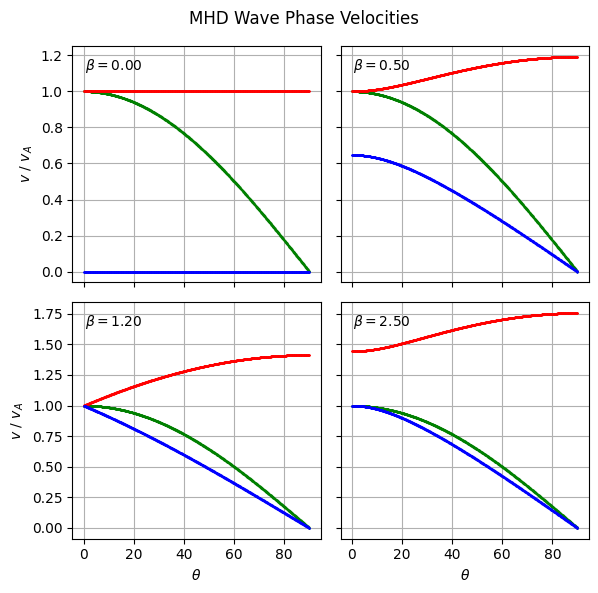

In [17]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(6, 6),
    sharex='col',
    sharey='row',
)

theta0 = np.linspace(0, np.pi / 2, 1000) * u.rad

k = 0
for i in range(2):
    for j in range(2):
        waves = mhd_waves(**inputs[k])
        k += 1
        
        for mode in range(3):
            r = waves[mode].phase_velocity(k0, theta0) / waves[mode].alfven_speed
            ax[i][j].plot(
                theta0 * 180 / np.pi,
                r,
                color[mode]
            )

        # ax_format(ax[i][j])
        ax[i][j].grid()
        text = rf'$\beta = {waves[0].beta:.2f}$'
        ax[i][j].text(0.05, 0.9, text, transform=ax[i][j].transAxes)

    ax[1][i].set_xlabel(r'$\theta$')
    ax[i][0].set_ylabel(r'$v\ /\ v_A$')


fig.suptitle('MHD Wave Phase Velocities')
fig.tight_layout()
plt.show()

## Bibliography

*  Bellan, Paul Murray (2006). _Fundamentals of Plasma Physics_. Cambridge: Cambridge University Press. ISBN 0521528003.
* Boyd, T. J. M.; Sanderson, J.J. (2003). _The Physics of Plasmas_. Cambridge: Cambridge University Press. doi:10.1017/CBO9780511755750
*  Somov, Boris V. (2012). _Plasma Astrophysics, Part I: Fundamentals and Practice_ (2nd ed.). New York, NY: Springer. ISBN 978-1-4614-4283-7.